# **Aprendizaje máquina sin el uso de frameworks**

Francisco Mestizo Hernández A01731549

## **Instrucciones**

Entregable: Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

* Crea un repositorio de GitHub para este proyecto.
* Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo.
* Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
* Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Desarrollo del modelo**


En términos generales, debemos seguir los siguientes pasos:
1. Importar módulos
2. Cargar datos
3. Separar datos en subconjuntos
4. Entrenar el modelo
5. Analizar su desempeño
6. Usar el modelo para nuevas estimaciones (datos no vistos)


Primero, comenzamos cargando el set de datos que utilizaremos para el modelo. En este caso serán los datos de **iris**. Este set de datos se puede encontrar en este link:

link

El set de datos consta de 150 registros, para tres clases diferentes de iris:
* Iris setosa
* Iris versicolor
* Iris virginica

Las variables independientes son el sepal length, sepal width, petal length, pedal width. Todas estas variables son numéricas y estan medidas en centímetros.

Debido a que en el set de datos se listan tres clases, entonces el problema que resolveremos será de clasificación de esas clases dependiendo de las caracteristicas de las plantas.

In [ ]:
#Cargamos los archivos
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive")  # utiliza comando

!pwd

#put your own path in google drive
%cd '/content/gdrive/MyDrive/Tec/ColabAI/iris/'
!ls

import pandas as pd # importar libreria

columns = ["sepal length","sepal width","petal length","petal width", "class"] # definir nombres de columna manualmente
df = pd.read_csv('iris.data', names=columns) # abrir el archivo de datos con los nombres dados para las columnas
df.head() # mostrar las primeras líneas del dataset que se cargó

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Tec/ColabAI/iris
/content/gdrive/MyDrive/Tec/ColabAI/iris
iris.data  iris.names


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Una vez que tenemos los datos cargados, importamos la función de train_test_split que nos ayuda a separar los datos en un set de entrenamiento y en un set de pruebas.

Para definir esto, separamos los datos en x (las variables independientes) y y (las variables dependientes). En este caso, lo que buscamos predecir es la clase de la planta basado en sus características.

Depués separamos en dos sets, el de entrenamiento con un 80% de los datos y el de pruebas con un 20% de los datos

In [ ]:
from sklearn.model_selection import train_test_split #importamos la funcion para hacer split de los datos

#dividimos en la variable dependiente y las independientes
X = df.drop("class", axis=1)
y = df["class"]

#Otenemos nuestros datos de prueba y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vemos el tamaño de los subsets de datos
X_train.shape, X_test.shape

((120, 4), (30, 4))

Para esta actividad usaremos un decision tree classifier. Lo declaramos y lo entrenamos con el set de datos de train.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el objeto de DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy")

# Entrenamos el modelo con los datos
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Para ver los resultados que obtenemos con el modelo, hacemos predicciones con el set de datos de testing. Podemos comprobar que tan buenos fueron las predicciones del modelo.

In [ ]:
# Con el modelo entrenado, hacemos predicciones sobre el testing
y_pred = tree.predict(X_test)

# Evaluamos que tantos resultados nos dio correctamente el modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


A primera instancia parece que el modelo es bastante bueno ya que clasificó perfectamente todos los datos de prueba.

Finalmente, podemos ver el modelo gráficamente para ver las decisiones que toma y que tan profundo es.

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsam

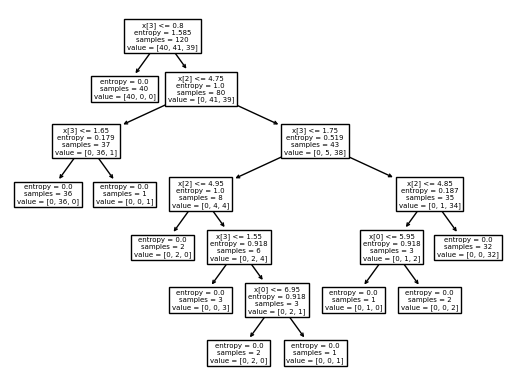

In [ ]:
#Graficamos el arbol para ver las decisiones que toma

from sklearn.tree import plot_tree
plot_tree(tree)